<a href="https://colab.research.google.com/github/kssss-bot/GeoAI-Gr5/blob/main/Cuaderno1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Esta es una obra derivada del original escrito por: Mahesh, Ankur and Tingzon, Isabelle**

@misc{mahesh2024land,
  title={Land Use and Land Cover (LULC) Classification using Deep Learning: Part I},
  author={Mahesh, Ankur and Tingzon, Isabelle},
  year={2024},
  howpublished={\url{https://climatechange.ai/tutorials?search=id:land-use-and-land-cover-lulc-classification-using-deep-learning-part-i}}
}

@misc{mahesh2024land,
  title={Land Use and Land Cover (LULC) Classification using Deep Learning: Part II},
  author={Mahesh, Ankur and Tingzon, Isabelle},
  year={2024},
  howpublished={\url{https://climatechange.ai/tutorials?search=id:land-use-and-land-cover-lulc-classification-using-deep-learning-part-ii}}
}

# <B> PARTE 1




# Clasificación del Uso y Cobertura del Suelo utilizando Pytorch  

**Creadores del contenido**: Isabelle Tingzon y Ankur Mahesh  

¡Bienvenido al tutorial de CCAI sobre la clasificación del uso y cobertura del suelo (LULC, por sus siglas en inglés) utilizando Pytorch!  

En este tutorial de dos partes, aprenderás a:  

- Entrenar un modelo de aprendizaje profundo para la clasificación de imágenes utilizando Pytorch.  
- Generar mapas de uso y cobertura del suelo empleando Python GIS.  

Puedes guardar una copia de este tutorial seleccionando Archivo → Guardar una copia en Drive.\

# Tabla de Contenido

*   [Resumen](#resumen)
*   [Impacto climático](#impacto-climatico)
*   [Audiencia objetivo](#audiencia-objetivo)
*   [Antecedentes y requisitos previos](#ARP)
*   [Requisitos de software](#requisitos-software)
*   [Descripción de los datos](#descripcion-datos)
*   [Metodología](#metodologia)
*   [Resultados](#resultados)
*   [Ejercicios](#ejercicios)
*   [Referencias](#referencias)





<a name="resumen"></a>
# Resumen

Este tutorial ofrece una introducción a la clasificación de imágenes utilizando Pytorch para la creación de mapas de uso y cobertura del suelo (LULC).

Específicamente, aprenderás a:

*   Clasificar imágenes satelitales en 10 categorías de LULC utilizando el conjunto de [datos EuroSAT](https://arxiv.org/abs/1709.00029).
*   Ajustar un modelo de red neuronal convolucional ResNet-50 para la clasificación de imágenes.
*   Guardar y cargar modelos entrenados en Pytorch.

<a name="impacto-climatico"></a>
# Impacto Climático

Un [informe](https://www.wri.org/insights/7-things-know-about-ipccs-special-report-climate-change-and-land) del Instituto de Recursos Mundiales (WRI, por sus siglas en inglés) señala que aproximadamente el 23 % de las emisiones globales de gases de efecto invernadero (GEI) causadas por el ser humano provienen de usos del suelo como la agricultura, la silvicultura y la expansión urbana. Los cambios en el uso del suelo, como la deforestación y la degradación del suelo, se encuentran entre los principales impulsores de estas emisiones. La urbanización acelerada, que genera un aumento en las áreas construidas y una pérdida masiva de almacenamiento de carbono terrestre, también puede dar lugar a emisiones significativas de carbono.

El mapeo de la extensión de las categorías de uso y cobertura del suelo a lo largo del tiempo es fundamental para mejorar el monitoreo ambiental, la planificación urbana y la protección de la naturaleza. Por ejemplo, monitorear los cambios en la cobertura forestal e identificar los factores que impulsan la pérdida de bosques puede ser útil para los esfuerzos de conservación y restauración forestal. Además, evaluar la vulnerabilidad de ciertos tipos de cobertura del suelo, como los asentamientos y las tierras agrícolas, frente a determinados riesgos puede contribuir tanto a la planificación para la reducción del riesgo de desastres como a los esfuerzos de adaptación climática a largo plazo.  

Con la creciente disponibilidad de datos de observación terrestre, junto con los avances recientes en visión por computadora, la combinación de inteligencia artificial (IA) y observación terrestre (EO, por sus siglas en inglés) ha abierto el camino para mapear el uso y la cobertura del suelo a una escala sin precedentes. En este tutorial, exploraremos el uso de imágenes satelitales de Sentinel-2 y modelos de aprendizaje profundo en Pytorch para automatizar el mapeo de LULC.  

<br>
<center><p><p> <img src="https://ptes.org/wp-content/uploads/2018/04/iStock-664630460-e1524839082464.jpg" alt="alt" width="50%"/>

<a name="audiencia-objetivo"></a>
# Audiencia Objetivo

Este tutorial está dirigido a científicos de datos experimentados y aspirantes que buscan ejemplos concretos de las aplicaciones del aprendizaje profundo en el contexto del cambio climático. Se espera que los usuarios tengan conocimientos previos en aprendizaje automático, incluyendo redes neuronales. ¡Pero no te preocupes si eres nuevo en estos temas! Proporcionaremos recursos adicionales y enlaces externos al final para que puedas profundizar en tu aprendizaje.

<a name="ARP"></a>

## Antecedentes y Requisitos Previos

Si necesitas repasar los conceptos sobre redes neuronales, te recomendamos revisar el video de [3Blue1Brown](https://www.youtube.com/c/3blue1brown) que encontrarás a continuación.  

También recomendamos encarecidamente la [colección de conferencias de Stanford](https://www.youtube.com/playlist?list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv) sobre redes neuronales convolucionales (CNNs) para reconocimiento visual. Además, los cursos de especialización en aprendizaje profundo de [deeplearning.ai](https://www.deeplearning.ai/courses/) ofrecen una introducción detallada a temas como redes neuronales artificiales (ANNs), redes convolucionales (CNNs), modelos secuenciales y otros conceptos clave del aprendizaje profundo.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('P28LKWTzrI')

<a name="requisitos-software"></a>

# Requisitos de Software

Este cuaderno requiere Python >= 3.7. Se requieren las siguientes bibliotecas:

*   tqdm
*   pandas
*   numpy
*   matplotlib
*   pytorch







## Habilitar GPU en Google Colab
Antes de comenzar, necesitarás acceso a una GPU. Afortunadamente, Google Colab ofrece acceso gratuito a recursos de cómputo, incluidos GPUs. Las GPUs actualmente disponibles en Colab incluyen Nvidia K80, T4, P4 y P100. Lamentablemente, no hay forma de elegir qué tipo de GPU puedes conectar en Colab. [Consulte aquí para más información.](https://research.google.com/colaboratory/faq.html#gpu-availability)

Para habilitar GPU en Google Colab:


1.   Navega a Editar → Configuración del cuaderno o Tiempo de ejecución → Cambiar tipo de tiempo de ejecución.
2.   Selecciona GPU en el menú desplegable de Acelerador de hardware.

In [ ]:
# Bibliotecas estándar
import os
import random
from tqdm.notebook import tqdm

# Manipulación y visualización de datos
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd
import numpy as np

# Bibliotecas de Aprendizaje Profundo
import torch
import torchvision
import torchsummary
from torch.utils import data
from torchvision import datasets, models, transforms

# Establecer semilla para reproducibilidad
SEED = 42
np.random.seed(SEED)

## GPU de Google Colab
Verifica que la GPU esté habilitada en tu cuaderno de Colab ejecutando la celda de abajo.

In [ ]:
# Comprobar si la GPU está habilitada
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))

# Obtener el modelo específico de la GPU
if str(device) == "cuda:0":
  print("GPU: {}".format(torch.cuda.get_device_name(0)))

Device: cuda:0
GPU: Tesla T4


## Montar Drive
Montar el drive permitirá que el cuaderno de Google Colab cargue y acceda a archivos desde tu Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


<a name="descripcion-datos"></a>
# Descripción de los Datos
En esta sección, aprenderás a:

*   Descargar el conjunto de datos EuroSAT en tu Google Drive
*   Generar los conjuntos de entrenamiento y prueba dividiendo el conjunto de datos EuroSAT
*   Visualizar una muestra de las imágenes y sus etiquetas LULC (Land Use/Land Cover)

## Conjunto de Datos EuroSAT
El conjunto de [datos EuroSAT](https://github.com/phelber/EuroSAT) contiene 27,000 fragmentos de imágenes satelitales Sentinel-2 etiquetados de 64x64 píxeles con 10 categorías diferentes de LULC. Están disponibles tanto imágenes RGB como multiespectrales (MS) para su descarga. Para simplificar, nos centraremos en la clasificación de imágenes RGB.

In [ ]:
!wget http://madm.dfki.de/files/sentinel/EuroSAT.zip -O EuroSAT.zip
!unzip -q EuroSAT.zip -d 'EuroSAT/'
!rm EuroSAT.zip

--2024-11-28 01:02:25--  http://madm.dfki.de/files/sentinel/EuroSAT.zip
Resolving madm.dfki.de (madm.dfki.de)... 131.246.195.183
Connecting to madm.dfki.de (madm.dfki.de)|131.246.195.183|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94280567 (90M) [application/zip]
Saving to: ‘EuroSAT.zip’

EuroSAT.zip         100%[===================>]  89.91M  13.6MB/s    in 7.7s    

2024-11-28 01:02:34 (11.7 MB/s) - ‘EuroSAT.zip’ saved [94280567/94280567]



## Generar Conjuntos de Entrenamiento y Prueba
### Crear una Clase de Conjunto de Datos Personalizada
En Pytorch, la clase `Dataset` permite definir una clase personalizada para cargar las entradas y los objetivos de un conjunto de datos. Usaremos esta capacidad para cargar nuestras entradas en forma de imágenes satelitales RGB junto con sus etiquetas correspondientes. Más adelante aprenderemos cómo aplicar las transformaciones necesarias a las imágenes (ver la siguiente sección).

In [ ]:
class EuroSAT(data.Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __getitem__(self, index):
        # Aplicar transformaciones a las imágenes
        if self.transform:
            x = self.transform(dataset[index][0])
        else:
            x = dataset[index][0]
        # Obtener la etiqueta de la clase
        y = dataset[index][1]
        return x, y

    def __len__(self):
        return len(dataset)

### Aumento de Datos

El aumento de datos es una técnica que aplica aleatoriamente transformaciones a las imágenes, como recortes, volteos horizontales y verticales, a las imágenes de entrada durante el entrenamiento del modelo. Estas perturbaciones reducen el sobreajuste (overfitting) de la red neuronal al conjunto de datos de entrenamiento y le permiten generalizar mejor al conjunto de datos de prueba no visto.

<br><br>
<center> <br>
<center> <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/0*ttoU2HOnBI8cb9Y2.png" width="400"/>
<br>
<font size=2>Fuente de la imagen: <a href="https://pranjal-ostwal.medium.com/data-augmentation-for-computer-vision-b88b818b6010">https://pranjal-ostwal.medium.com/data-augmentation-for-computer-vision-b88b818b6010</a></a> </font>
<br>
</center>
</center>
<br>
<font size=2>Fuente de la imagen: Ahmad, Jamil & Muhammad, Khan & Baik, Sung. (2017). Aprendizaje profundo asistido por aumento de datos de bocetos parcialmente coloreados a mano para búsqueda visual. PLOS ONE. 12. e0183838. 10.1371/journal.pone.0183838. </font>
<br>

### Normalización de Imágenes

Además, en la celda de abajo, el método transforms.Normalize normaliza cada uno de los tres canales con las medias y desviaciones estándar proporcionadas en las variables imagenet_mean e imagenet_std. ImageNet es un gran conjunto de datos de entrenamiento compuesto por imágenes y etiquetas. Más adelante en este tutorial, utilizaremos un modelo preentrenado en este conjunto de datos. Para poder usar este modelo preentrenado en nuestro conjunto de datos LULC, necesitamos asegurarnos de que el conjunto de datos de entrada esté normalizado con las mismas estadísticas (media y desviación estándar) que ImageNet.

<br>
<center> <img src="https://cv.gluon.ai/_images/imagenet_banner.jpeg" width="400"/>
<br>
<font size=2>Fuente de la imagen: <a href=" https://cv.gluon.ai/build/examples_datasets/imagenet.html">https://cv.gluon.ai/build/examples_datasets/imagenet.html</a></font>
<br>
</center>

Investigaciones existentes han encontrado que usar modelos preentrenados en grandes conjuntos de datos, como ImageNet, mejora la precisión al aplicar estas redes neuronales a nuevos conjuntos de datos. Los modelos preentrenados sirven como excelentes extractores de características genéricas. [Por favor, lee aquí para más información.](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html).

In [ ]:
input_size = 224
imagenet_mean, imagenet_std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(input_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])

val_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.CenterCrop(input_size),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])

test_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.CenterCrop(input_size),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])

### Cargar el Conjunto de Datos EuroSAT

Comencemos cargando el conjunto de datos EuroSAT utilizando la clase `ImageFolder` de torch.  

`ImageFolder` es un cargador de datos genérico que organiza las imágenes de la siguiente manera:  

```
    data
    └───AnnualCrop
    │   │   AnnualCrop_1.jpg
    │   │   AnnualCrop_2.jpg
    │   │   AnnualCrop_3.jpg
    │   │   ...
    └───Forest
    │   │   Forest_1.jpg
    │   │   Forest_2.jpg
    │   │   Forest_3.jpg
    │   │   ...
```

In [ ]:
# Cargar el conjunto de datos
data_dir = './EuroSAT/2750/'
dataset = datasets.ImageFolder(data_dir)

# Obtener las categorías de LULC
class_names = dataset.classes
print("Class names: {}".format(class_names))
print("Total number of classes: {}".format(len(class_names)))

Class names: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
Total number of classes: 10


### Dividir en Conjuntos de Entrenamiento, Validación y Prueba

Aquí dividimos el conjunto de datos en un conjunto de entrenamiento y uno de prueba. El conjunto de entrenamiento representará el 70 % del conjunto EuroSAT, seleccionado aleatoriamente. Reservamos el 15 % del conjunto de datos como conjunto de validación y el 15 % restante como conjunto de prueba.

In [ ]:
# Aplicar diferentes transformaciones a los conjuntos de entrenamiento y prueba
train_data = EuroSAT(dataset, train_transform)
val_data = EuroSAT(dataset, val_transform)
test_data = EuroSAT(dataset, test_transform)

# Dividir aleatoriamente el conjunto de datos en 70% entrenamiento / 15% validación / 15% prueba
# creando subconjuntos a partir de los conjuntos de datos transformados de entrenamiento y prueba
train_size = 0.70
val_size = 0.15
indices = list(range(int(len(dataset))))
train_split = int(train_size * len(dataset))
val_split = int(val_size * len(dataset))
np.random.shuffle(indices)

train_data = data.Subset(train_data, indices=indices[:train_split])
val_data = data.Subset(val_data, indices=indices[train_split: train_split+val_split])
test_data = data.Subset(test_data, indices=indices[train_split+val_split:])
print("Train/val/test sizes: {}/{}/{}".format(len(train_data), len(val_data), len(test_data)))

Train/val/test sizes: 18900/4050/4050


Finalmente, utilizamos la clase `DataLoader` de `torch` para crear un cargador de datos. El cargador de datos gestiona la obtención de muestras de los conjuntos de datos (incluso puede hacerlo en paralelo utilizando `num_workers`) y ensambla los lotes de los conjuntos de datos.

In [ ]:
num_workers = 2
batch_size = 16

train_loader = data.DataLoader(
    train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True
)
val_loader = data.DataLoader(
    val_data, batch_size=batch_size, num_workers=num_workers, shuffle=False
)
test_loader = data.DataLoader(
    test_data, batch_size=batch_size, num_workers=num_workers, shuffle=False
)

## Visualizar Datos  

En la celda siguiente, visualizaremos un lote del conjunto de datos. La celda muestra la entrada a la red neuronal (la imagen RGB) junto con la etiqueta asociada.  

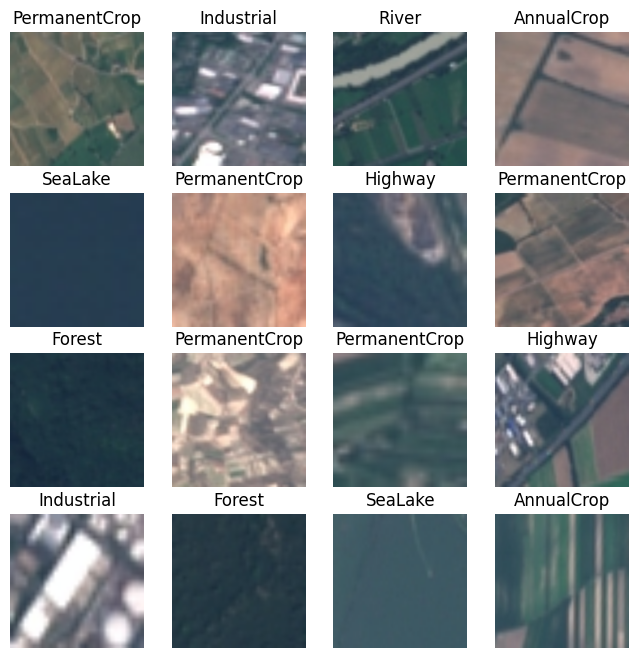

In [ ]:
n = 4
inputs, classes = next(iter(train_loader))
fig, axes = plt.subplots(n, n, figsize=(8, 8))

for i in range(n):
  for j in range(n):
    image = inputs[i * n + j].numpy().transpose((1, 2, 0))
    image = np.clip(np.array(imagenet_std) * image + np.array(imagenet_mean), 0, 1)

    title = class_names[classes[i * n + j]]
    axes[i, j].imshow(image)
    axes[i, j].set_title(title)
    axes[i, j].axis('off')

# Análisis Exploratorio de Datos  

A continuación, exploremos un poco más nuestro conjunto de datos. En particular, ¿cuántas imágenes de cada clase están incluidas?

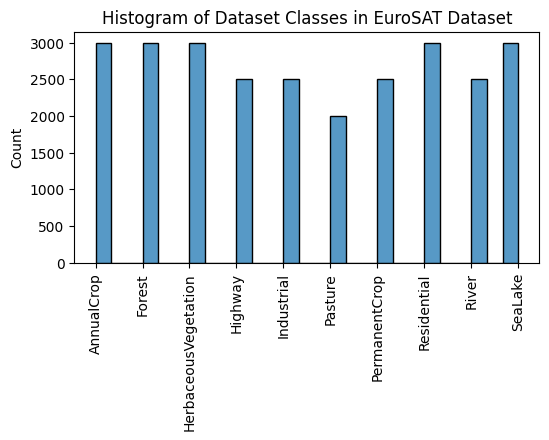

In [ ]:
plt.figure(figsize=(6, 3))
hist = sns.histplot(dataset.targets)

hist.set_xticks(range(len(dataset.classes)))
hist.set_xticklabels(dataset.classes, rotation=90)
hist.set_title('Histogram of Dataset Classes in EuroSAT Dataset')

plt.show()

<a name="metodologia"></a>
# Desarrollo del Modelo

## Instanciar el Modelo

Primero, instanciemos el modelo. Para comenzar, utilizaremos una arquitectura estándar de redes neuronales llamada ResNet50. Basado en el trabajo de [Helber et al.](https://arxiv.org/pdf/1709.00029.pdf), se ha demostrado que ResNet-50 funciona bien para la clasificación de LULC (Uso de Suelo y Cobertura del Suelo) en el conjunto de datos EuroSAT.

### ResNet-50
<b>Recordatorio</b>: Las redes neuronales profundas son difíciles de entrenar debido al problema de los gradientes que se desvanecen o explotan (multiplicaciones repetidas que hacen que el gradiente se vuelva infinitamente pequeño). ResNet soluciona esto mediante el uso de conexiones de acceso directo que conectan las activaciones de una capa anterior con una capa posterior, omitiendo una o más capas como se muestra a continuación. Esto permite que los gradientes se propaguen a las capas más profundas antes de que se reduzcan a valores pequeños o nulos.
<br><br>

<center> <img src="https://jananisbabu.github.io/ResNet50_From_Scratch_Tensorflow/images/resnet50.png" width="600"/><br>
Fuente de la imagen: <a href="https://jananisbabu.github.io/ResNet50_From_Scratch_Tensorflow/">https://jananisbabu.github.io/ResNet50_From_Scratch_Tensorflow/  </a>
</center>
<br>

Tenga en cuenta que cuando cargamos el modelo, establecemos `weights=models.ResNet50_Weights.DEFAULT` para indicar que el modelo cargado debe estar ya preentrenado en el conjunto de datos Imagenet. También modificamos la capa final para que la salida coincida con el número de clases de nuestro conjunto de datos.


In [ ]:
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
model.fc = torch.nn.Linear(model.fc.in_features, len(dataset.classes))
model = model.to(device)
torchsummary.summary(model, (3, 224, 224))

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 160MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

## Entrenamiento y Evaluación del Modelo

Ahora podemos proceder con el entrenamiento y la evaluación del modelo.

Esta sección se divide en tres partes principales:

1. Especificar el criterio, el optimizador y los hiperparámetros (por ejemplo, el número de épocas, la tasa de aprendizaje, etc.).
2. Entrenar el modelo en el conjunto de entrenamiento actualizando sus pesos para minimizar la función de pérdida.
3. Evaluar el modelo en el conjunto de prueba para observar su rendimiento con datos nuevos y no vistos.
4. Repetir los pasos 2 y 3 durante `n_epochs` épocas.

### Pérdida por Entropía Cruzada
Definimos nuestra función de pérdida como la pérdida por entropía cruzada, que mide el rendimiento de un modelo de clasificación cuyo resultado es un valor de probabilidad entre 0 y 1. La pérdida por entropía cruzada aumenta a medida que la probabilidad predicha se aleja de la etiqueta real. ([Fuente](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html))

Para dos clases, se calcula como:

$−y \log(p) − (1−y) \log(1−p)$

Para clasificación multiclase con $M$ clases, se define como:

$−\sum_{c=1}^{M} y_{o,c} \log(p_{o,c})$

donde:

- $M$ - número de clases (perro, gato, pez)
- $log$ - logaritmo natural
- $y_{o,c}$ - indicador binario (0 o 1) si la etiqueta de clase $c$ es la clasificación para la observación $o$
- $p_{o,c}$ - probabilidad predicha de que la observación $o$ sea de la clase $c$

### Descenso de Gradiente Estocástico
Recuerde que el objetivo del descenso de gradiente estocástico (SGD) es minimizar la función de pérdida. Para hacer esto, calcula la pendiente (gradiente) de la función de pérdida en el punto actual y se mueve en la dirección opuesta a la pendiente hacia el descenso más pronunciado.

<center> <img src="https://miro.medium.com/max/1400/1*P7z2BKhd0R-9uyn9ThDasA.png" width="350"/><br>Fuente de la imagen:
<a href="https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a">https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a</a>
</center>
<br>

In [ ]:
# Especificar el número de épocas y la tasa de aprendizaje
n_epochs = 10
lr = 1e-3

# Especificar el criterio y el optimizador
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

Siguiente. Vamos a crear nuestra función de entrenamiento.

In [ ]:
def train(model, dataloader, criterion, optimizer):
  model.train()

  running_loss = 0.0
  running_total_correct = 0.0

  for i, (inputs, labels) in enumerate(tqdm(dataloader)):
    inputs = inputs.to(device)
    labels = labels.to(device)

    # Poner a cero los gradientes de los parámetros
    # Borrar los pesos anteriores para obtener los pesos actualizados.
    optimizer.zero_grad()

    # Paso hacia adelante
    outputs = model(inputs)

    # Calcular la pérdida
    loss = criterion(outputs, labels)

    # Calcular los gradientes respecto a la pérdida
    loss.backward()

    # Actualizar los pesos basados en los gradientes almacenados internamente
    optimizer.step()

    # Calcular estadísticas
    _, preds = torch.max(outputs, 1)

    # Calcular la pérdida y precisión acumuladas
    running_loss += loss.item() * inputs.size(0)
    running_total_correct += torch.sum(preds == labels)

  # Calcular la pérdida y precisión de la época
  epoch_loss = running_loss / len(dataloader.dataset)
  epoch_accuracy = (running_total_correct / len(dataloader.dataset)) * 100
  print(f"Train Loss: {epoch_loss:.2f}; Accuracy: {epoch_accuracy:.2f}")

  return epoch_loss, epoch_accuracy

Siguiente, definamos la función de evaluación del modelo.

In [ ]:
def evaluate(model, dataloader, criterion, phase="val"):
  model.eval()

  running_loss = 0.0
  running_total_correct = 0.0

  for i, (inputs, labels) in enumerate(tqdm(dataloader)):
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.set_grad_enabled(False):
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      _, preds = torch.max(outputs, 1)

    running_loss += loss.item() * inputs.size(0)
    running_total_correct += torch.sum(preds == labels)

  # Calcular la pérdida y precisión de la época
  epoch_loss = running_loss / len(dataloader.dataset)
  epoch_accuracy = (running_total_correct / len(dataloader.dataset)) * 100
  print(f"{phase.title()} Loss: {epoch_loss:.2f}; Accuracy: {epoch_accuracy:.2f}")

  return epoch_loss, epoch_accuracy

Poniéndolo todo junto, definimos la función fit para entrenar y evaluar el modelo en el conjunto de entrenamiento y el conjunto de validación, respectivamente.

In [ ]:
def fit(model, train_loader, val_loader, n_epochs, lr, criterion, optimizer):
  # Hacer un seguimiento de la mejor pérdida y
  # los mejores pesos del modelo con la menor pérdida
  best_loss = np.inf
  best_model = None

  # Entrenar y probar durante n_épocas
  for epoch in range(n_epochs):
    print("Epoch {}".format(epoch+1))
    train(model, train_loader, criterion, optimizer)
    val_loss, _ = evaluate(model, val_loader, criterion)

    if val_loss < best_loss:
      best_loss = val_loss
      best_model = model

  return best_model

Ahora podemos comenzar el entrenamiento y la evaluación del modelo en la siguiente celda.

In [ ]:
best_model = fit(model, train_loader, val_loader, n_epochs, lr, criterion, optimizer)

Epoch 1


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 1.70; Accuracy: 50.99


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 1.13; Accuracy: 72.30
Epoch 2


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.98; Accuracy: 69.65


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.66; Accuracy: 82.35
Epoch 3


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.74; Accuracy: 76.94


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.47; Accuracy: 86.86
Epoch 4


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.62; Accuracy: 80.03


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.35; Accuracy: 90.35
Epoch 5


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.53; Accuracy: 82.61


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.29; Accuracy: 91.98
Epoch 6


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.48; Accuracy: 84.39


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.22; Accuracy: 93.78
Epoch 7


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.43; Accuracy: 85.75


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.20; Accuracy: 94.02
Epoch 8


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.41; Accuracy: 86.70


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.19; Accuracy: 94.30
Epoch 9


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.37; Accuracy: 87.95


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.16; Accuracy: 95.28
Epoch 10


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.36; Accuracy: 88.44


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.15; Accuracy: 95.19


En el ejemplo anterior, solo entrenamos el modelo durante 10 épocas. En la práctica, querrás entrenar el modelo durante mucho más tiempo para obtener los mejores resultados.

##Desempeño del Modelo en el Conjunto de Prueba
Usando el mejor modelo de los pasos anteriores, podemos evaluar el desempeño del modelo en el conjunto de prueba.

In [ ]:
test_loss, _ = evaluate(best_model, test_loader, criterion, phase="test")

  0%|          | 0/254 [00:00<?, ?it/s]

Test Loss: 0.16; Accuracy: 95.41


##Guardar el Modelo
Definamos una función para guardar el modelo en nuestro Google Drive local de la siguiente manera.

In [ ]:
model_dir = "./drive/My Drive/GeoAI/GeoAI-Grupo5/"
if not os.path.exists(model_dir):
  os.makedirs(model_dir)

model_file = os.path.join(model_dir, 'best_model.pth')
model_file

'./drive/My Drive/GeoAI/GeoAI-Grupo5/best_model.pth'

In [ ]:
def save_model(best_model, model_file):
  torch.save(best_model.state_dict(), model_file)
  print('Model successfully saved to {}.'.format(model_file))

##Cargar el Modelo
Aquí te mostramos cómo cargar el modelo guardado en el paso anterior.

In [ ]:
def load_model(model_file):
  # Descomenta esto para descargar el archivo del modelo

  #if not os.path.isfile(model_file):
  model_file = 'best_model.pth'
  !gdown "13AFOESwxKmexCoOeAbPSX_wr-hGOb9YY"

  model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
  model.fc = torch.nn.Linear(model.fc.in_features, 10)
  model.load_state_dict(torch.load(model_file))
  model.eval()

  print('Model file {} successfully loaded.'.format(model_file))
  return model

<a name="resultados"></a>
#Resultados
Vamos a visualizar un ejemplo de la red neuronal haciendo una predicción.

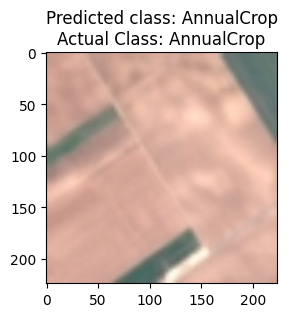

In [ ]:
# Recuperar una imagen de muestra
index = 15
image, label = test_data[index]

# Predecir sobre la muestra
model = model.to("cpu")
output = model(image.unsqueeze(0))
_, pred = torch.max(output, 1)

# Obtener la etiqueta de clase correspondiente
label = class_names[label]
pred = class_names[pred[0]]

# Visualizar la muestra y la predicción
image = image.cpu().numpy().transpose((1, 2, 0))
image = np.clip(np.array(imagenet_std) * image + np.array(imagenet_mean), 0, 1)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(image)
ax.set_title("Predicted class: {}\nActual Class: {}".format(pred, label));

Aquí mostramos cómo ejecutar el modelo sobre una imagen PIL.

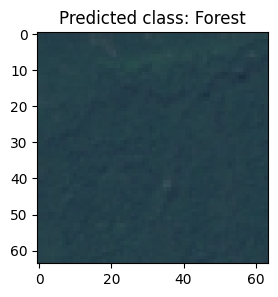

In [ ]:
from PIL import Image
image_path = './EuroSAT/2750/Forest/Forest_2.jpg'
image = Image.open(image_path)

# Transformar la imagen
input = test_transform(image)

# Predecir sobre la muestra
output = model(input.unsqueeze(0))

# Obtener la etiqueta de clase correspondiente
_, pred = torch.max(output, 1)
pred = class_names[pred[0]]

# Visualizar los resultados
fig, ax = plt.subplots(figsize=(3,3))
ax.imshow(image)
ax.set_title("Predicted class: {}".format(pred));

<a name="ejercicios"></a>
# Ejercicio 1: Experimentar con una estrategia de ajuste fino diferente.

Hasta ahora, hemos inicializado la CNN con pesos de un modelo entrenado en los datos de ImageNet y hemos reentrenado el modelo en el conjunto de datos EuroSAT actualizando **todos los pesos**. Otra estrategia de ajuste fino implica usar las capas convolucionales preentrenadas como un extractor de características fijo y congelar esos pesos, actualizando solo los pesos de las últimas capas completamente conectadas para la clasificación.

⭐ **¡ES TU TURNO!:** Congela todas las capas excepto las finales de un modelo ResNet50. ¿Cómo se compara esta estrategia de ajuste fino con la estrategia anterior?

In [ ]:
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
model.fc = torch.nn.Linear(model.fc.in_features, len(dataset.classes))
model = model.to(device)

# Congelar todas las capas
for param in model.parameters():
    param.requires_grad = False

# Agregar la capa final (no congelada) para clasificación
model.fc = torch.nn.Linear(model.fc.in_features, len(dataset.classes))
model = model.to(device)

# Comenzar el entrenamiento
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
best_model = fit(model, train_loader, val_loader, n_epochs, lr, criterion, optimizer)

Epoch 1


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 1.96; Accuracy: 46.28


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 1.79; Accuracy: 55.85
Epoch 2


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 1.56; Accuracy: 58.20


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 1.54; Accuracy: 61.04
Epoch 3


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 1.36; Accuracy: 63.53


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 1.41; Accuracy: 64.72
Epoch 4


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 1.24; Accuracy: 65.88


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 1.25; Accuracy: 69.38
Epoch 5


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 1.16; Accuracy: 67.63


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 1.24; Accuracy: 68.10
Epoch 6


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 1.10; Accuracy: 69.01


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 1.11; Accuracy: 70.57
Epoch 7


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 1.06; Accuracy: 69.10


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 1.05; Accuracy: 72.99
Epoch 8


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 1.01; Accuracy: 70.79


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 1.05; Accuracy: 75.56
Epoch 9


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.98; Accuracy: 71.45


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 1.03; Accuracy: 73.78
Epoch 10


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.96; Accuracy: 71.48


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 1.03; Accuracy: 71.53


# Ejercicio 2: Experimentar con diferentes modelos CNN preentrenados en ImageNet.

ResNet50 es solo una de las muchas arquitecturas de modelos CNN diferentes. Determinar la mejor arquitectura de modelo es una parte importante del proceso de selección de modelos, y en la práctica, es recomendable probar y comparar diferentes arquitecturas de modelos. Una descripción detallada de los modelos CNN preentrenados compatibles en Pytorch se puede encontrar aquí: [https://pytorch.org/vision/0.18/models.html](https://pytorch.org/vision/0.18/models.html)

⭐ **¡ES TU TURNO!**: Prueba un modelo CNN preentrenado diferente de Pytorch, basado en los modelos disponibles que se encuentran aquí. ¿Qué tan bien se desempeña en comparación con ResNet50?

Asegúrate de modificar la última capa para la clasificación para que coincida con el número de clases (Pista: el número de clases = len(dataset.classes)).

In [ ]:
model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)

# Modificar la última capa para la clasificación
model.classifier[1] = torch.nn.Linear(model.classifier[1].in_features, len(dataset.classes))

model = model.to(device)
torchsummary.summary(model, (3, 224, 224))

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 97.3MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              SiLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              SiLU-6         [-1, 32, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 112]               0
           Conv2d-13         [-1, 16, 112, 112]             512
      BatchNorm2d-14         [-1, 16, 1

In [ ]:
# Comenzar el entrenamiento
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
best_model = fit(model, train_loader, val_loader, n_epochs, lr, criterion, optimizer)

Epoch 1


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 1.70; Accuracy: 51.87


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 1.21; Accuracy: 71.78
Epoch 2


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 1.06; Accuracy: 69.80


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.71; Accuracy: 83.48
Epoch 3


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.79; Accuracy: 76.28


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.46; Accuracy: 89.19
Epoch 4


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.67; Accuracy: 78.97


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.35; Accuracy: 90.94
Epoch 5


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.60; Accuracy: 81.11


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.29; Accuracy: 92.35
Epoch 6


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.53; Accuracy: 82.99


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.24; Accuracy: 93.53
Epoch 7


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.52; Accuracy: 82.94


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.21; Accuracy: 93.73
Epoch 8


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.48; Accuracy: 84.73


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.19; Accuracy: 94.74
Epoch 9


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.45; Accuracy: 85.69


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.19; Accuracy: 94.32
Epoch 10


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 0.42; Accuracy: 86.56


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 0.14; Accuracy: 95.93


# Ejercicio 3: Experimentar con modelos CNN preentrenados en imágenes satelitales.

Tradicionalmente, los profesionales han confiado en modelos preentrenados en ImageNet para tareas de aprendizaje por transferencia, incluso para datos de Observación de la Tierra. Sin embargo, con la creciente disponibilidad de datos de teledetección, ahora estamos viendo cada vez más conjuntos de datos de teledetección a gran escala que se están curando para el preentrenamiento de modelos, como el [SSL4EO-S12](https://github.com/zhu-xlab/SSL4EO-S12) de Wang et al. Los modelos entrenados con estos conjuntos de datos utilizan técnicas de aprendizaje no supervisado/autosupervisado, aprovechando la gran cantidad de datos de teledetección en bruto y no etiquetados para el preentrenamiento de modelos.

Estos pesos preentrenados están disponibles a través de la [biblioteca Torchgeo](https://github.com/microsoft/torchgeo). Más información sobre los pesos preentrenados disponibles se puede encontrar aquí: https://torchgeo.readthedocs.io/en/stable/api/models.html#pretrained-weights

⭐ **¡ES TU TURNO!:** Usando torchgeo, carga un modelo ResNet50 preentrenado en Sentinel-2 y ajusta el modelo actualizando **`todos los pesos`**. ¿Cómo se compara este modelo con el modelo ResNet50 preentrenado en ImageNet?

In [ ]:
!pip install -q timm
!pip install -q torchgeo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.5/454.5 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.4/899.4 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 834.9/834.9 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 36.5 MB/s eta

In [ ]:
import timm
from torchgeo.models import ResNet50_Weights

weights = ResNet50_Weights.SENTINEL2_RGB_MOCO
model = timm.create_model(
    "resnet50", in_chans=weights.meta["in_chans"],
    num_classes=len(dataset.classes)
)
model.load_state_dict(weights.get_state_dict(progress=True), strict=False)

model = model.to(device)
torchsummary.summary(model, (3, 224, 224))

Downloading: "https://hf.co/torchgeo/resnet50_sentinel2_rgb_moco/resolve/efd9723b59a88e9dc1420dc1e96afb25b0630a3c/resnet50_sentinel2_rgb_moco-2b57ba8b.pth" to /root/.cache/torch/hub/checkpoints/resnet50_sentinel2_rgb_moco-2b57ba8b.pth
100%|██████████| 90.0M/90.0M [00:01<00:00, 72.7MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
         Identity-10           [-1, 64, 56, 56]               0
             ReLU-11           [-1, 64, 56, 56]               0
         Identity-12           [-1, 64, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
# Comenzar el entrenamiento
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
best_model = fit(model, train_loader, val_loader, n_epochs, lr, criterion, optimizer)

Epoch 1


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 2.28; Accuracy: 33.42


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 2.23; Accuracy: 48.37
Epoch 2


  0%|          | 0/1182 [00:00<?, ?it/s]

Train Loss: 2.19; Accuracy: 46.16


  0%|          | 0/254 [00:00<?, ?it/s]

Val Loss: 2.04; Accuracy: 45.14
Epoch 3


  0%|          | 0/1182 [00:00<?, ?it/s]

<a name="referencias"></a>
# Referencias
- Helber, P., Bischke, B., Dengel, A., & Borth, D. (2019). Eurosat: Un nuevo conjunto de datos y referencia de aprendizaje profundo para clasificación de uso y cobertura del suelo. IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, 12(7), 2217-2226.
- Wang, Y., Braham, N. A. A., Xiong, Z., Liu, C., Albrecht, C. M., & Zhu, X. X. (2023). SSL4EO-S12: Un conjunto de datos multimodal y multitemporal a gran escala para aprendizaje autosupervisado en observación de la Tierra [Software y conjuntos de datos]. IEEE Geoscience and Remote Sensing Magazine, 11(3), 98-106.

# <B> PARTE 2

# Automatización del mapeo de uso y cobertura del suelo usando Python

Creadores de contenido: Ankur Mahesh e Isabelle Tingzon.

Previamente aprendió a entrenar un modelo de aprendizaje profundo para clasificar los parches de imágenes de sentinel-2 en las diferentes categorías de uso y cobertura del suelo.

En este apartado aprenderá como :

*   Como descargar sus propias imágenes satelitales de Sentinel-2 a traves de Google Earth Engine
*   Uso del modelo entrenado en el apartado anterior para generar automáticamente un mapa LULC para una región de interés

## Tabla de Contenido

1.   [Introducción a los datos geoespaciales]()
2.   [Descarga de los límites territoriales](#admin-bounds)
3.   [Generación de imagen del satélite Sentinel-2](#sentinel-2)
4.   [Generación de los mosaicos en formato GeoJSON de 64 x 64 Pixeles](#tiles)
5.   [Generación del mapa LULC](#lulc-maps)
6.   [Conclusiones y pasos a seguir]()

# Introduccion a los datos geoespaciales

Durante este subcapítulo se presenta una introducción al procesamiento de datos geoespaciales usando Python. El objetivo es presentar conceptos básicos y herramientas de uso común para la manipulación, análisis y visualización de los datos geoespaciales; nuestro público objetivo son aquellas personas que son nuevas en el lenguaje de Python como herramienta para el análisis de los datos geoespaciales y que buscan herramientas para comenzar a trabajar con dichos datos.

## Tipos de Datos Espaciales

Las observaciones de datos espaciales se centran en la *ubicación*. Hay dos tipos principales de datos espaciales:



*   **Datos en formato Vector** -  Son básicamente puntos, rectas y polígonos. Cada objeto vectorial puede constar de una o más ubicaciones de coordenadas XY. Los vectores se pueden utilizar para representar, por ejemplo, ubicaciones de lugares (por ejemplo, escuelas, hospitales), carreteras o fronteras de países. Los objetos vectoriales se pueden almacenar utilizando formatos de datos espaciales como GeoJSON (.geojson), GeoPackage (.gpkg), Shapefile (.shp).
*   **Datos en formato Raster** - están compuestos por una cuadrícula de píxeles. Los ejemplos incluyen imágenes de satélite multiespectrales, mapas de luminosidad nocturna y mapas de elevación digitales. Cada píxel representa un valor o clase, p.e. valores de rojo, verde y azul en imágenes de satélite; intensidad de la luz nocturna en mapas NTL; altura en mapas de elevación. Los datos ráster se almacenan comúnmente como GeoTIFF (.tiff).

Para obtener más información sobre los datos de formato vectores y ráster, [diríjase al siguiente link](https://gisgeography.com/spatial-data-types-vector-raster/)

<img src="https://slideplayer.com/slide/6229417/20/images/10/Spatial+data%3A+Vector+vs+Raster.jpg=100x100" width="350"/>



## Sistemas de Referencia de Coordenadas

Las proyecciones cartográficas son representaciones 2D de la Tierra sobre una superficie plana. Pero debido a que la Tierra es esferoidal, no existe una forma única y más precisa de representar la Tierra en dos dimensiones, lo que da como resultado una serie de sistemas de coordenadas que sirven para diferentes propósitos.(Se recomienda ver el siguiente Video ["Why all world maps are wrong"](https://www.youtube.com/watch?v=kIID5FDi2JQ&ab_channel=Vox)).

Los **Sistemas de Referencia de Coordenadas** (SRC) proporcionan un método para definir ubicaciones del mundo real en el espacio geográfico. Estos sistemas determinan no sólo las ubicaciones de coordenadas de los objetos, sino también el aspecto del mapa y cómo se calcula la distancia.

Los datos geoespaciales, ya sean vectoriales o rasterizados, siempre van acompañados de información SRC. Dos sistemas de coordenadas comunes son EPSG:3857 (Web Mercator) y EPSG:4326 (WGS 84); en este tutorial, usaremos este último SRC.

In [ ]:
from Ipython.display import YouTubeVideo
YouTubeVideo('kIID5FDi2JQ')

## Herramientas de procesamiento de datos geoespaciales

A continuación presentamos las siguientes herramientas de análisis geoespacial y paquetes de Python:

- [**Google Earth Engine**](https://earthengine.google.com/) - este es un archivo de datos públicos de petabytes de imágenes satelitales históricas y conjuntos de datos geoespaciales. En este tutorial, usaremos el [Python Earth Engine API](https://developers.google.com/earth-engine/#api) para acceder a las imágenes del satélite Sentinel-2; debe tener en cuenta que para acceder a Google Earth Engine debe estar registrado en https://code.earthengine.google.com/.

- [**GeoPandas**](https://geopandas.org/) - Es una libreria que extiende las funcionalidades de la libreria Pandas para añadir soporte a los datos geográficos y análisis geoespaciales.

- [**Rasterio**](https://rasterio.readthedocs.io/en/latest/) - Los datos ráster, como las imágenes de satélite, suelen almacenarse en formato GeoTIFF. La biblioteca Rasterio le permite leer y escribir estos formatos y realizar operaciones geoespaciales avanzadas en estos conjuntos de datos.

-  [**Folium**](https://python-visualization.github.io/folium/) - Le permite visualizar datos geoespaciales en un mapa de folleto interactivo.

Para conocer más acerca de las herramientas de análisis geoespaciales revise la siguiente documentación [comprehensive list of Python packages](https://github.com/giswqs/python-geospatial).

In [ ]:
%%capture
##instalación de librerias de python para análisis y visualización de datos geográficos
!pip -q install --upgrade folium
!apt install libspatialindex-dev
!pip -q install rtree
!pip -q install geopandas
!pip -q install geojson
!pip -q install geemap==0.17.3
!pip -q uninstall tornado -y
!yes | pip install tornado==5.1.0
!pip -q install rasterio
!pip -q install tqdm
!pip -q install eeconvert

In [ ]:
# importación de librerias básicas
import os
from tqdm.notebook import tqdm
import requests
import json

import pandas as pd
import numpy as np
from PIL import Image

# Geospatial processing packages
import geopandas as gpd
import geojson

import shapely
import rasterio as rio
from rasterio.plot import show
import rasterio.mask
from shapely.geometry import box

# Mapping and plotting libraries
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import ee
import eeconvert as eec
import geemap
import geemap.eefolium as emap
import folium

# Deep learning libraries
import torch
from torchvision import datasets, models, transforms

## Unidad de Montaje

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

## Autenticación de Google Earth Engine

Asegurese de haberse registrado para acceder a Google Earth Engine en  https://signup.earthengine.google.com/#!/. Una vez su solicitud ha sido aprobada deberia tener acceso a Google Earth Engine en https://code.earthengine.google.com/.

In [ ]:
##Autenticación e Inicialización en Google Earth Engine (GEE) con Python
ee.Authenticate()
ee.Initialize(project="<ENTER PROJECT NAME>")

<a name="admin-bounds"></a>
# Descarga de los límites terriroriales

Nuestro primer paso es descargar los límites administrativos de nuestro país de interés, los cuales obtendremos a través de [geoBoundaries by the William and Mary GeoLab](https://www.geoboundaries.org/index.html); geoBoundaries es una base de datos global gratuita y de acceso abierto sobre las fronteras políticas administrativas de todos los países del mundo. Los límites geográficos se pueden descargar mediante acceso API mediante una simple consulta:

```
https://www.geoboundaries.org/gbRequest.html?ISO=[3-LETTER-ISO-CODE]&ADM=[ADM-LEVEL]
```
- **ISO**: el código ISO de tres letras que representa el país de interés

  - [Revisar la siguiente página](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes) para obtener la lista completa de códigos ISO para cada país.

 - **ADM**: uno de ADM0, ADM1, ADM2, ADM3, ADM4 o ADM5, que representa cada nivel de jerarquía administrativa.

Para conocer más revise la siguiente documentación [API documentation](https://www.geoboundaries.org/api.html).

En este ejemplo, elegimos **Alemania** como nuestra área de interés. Configuramos el código ISO en "DEU" y ADM en "ADM2". La consulta debería devolver las geometrías de los 403 distritos administrativos de Alemania. En la siguiente celda, enviamos una solicitud para los límites administrativos de Alemania, guardamos el resultado como un archivo GeoJSON y leemos el archivo usando GeoPandas.

In [ ]:
ISO = 'DEU' # "DEU" es el  ISO código para Alemania
ADM = 'ADM3' # Equivalente a los distritos administrativos

# Query geoBoundaries
url = f"https://www.geoboundaries.org/api/current/gbOpen/{ISO}/{ADM}"
r = requests.get(url)
download_path = r.json()["gjDownloadURL"]

# Guardado de los resultados como archivos GeoJSON
filename = 'geoboundary.geojson'
geoboundary = requests.get(download_path).json()
with open(filename, 'w') as file:
   geojson.dump(geoboundary, file)

# Lectura de datos usando GeoPandas
geoboundary = gpd.read_file(filename)
print("Data dimensions: {}".format(geoboundary.shape))
geoboundary.sample(3)

En este ejemplo, visualizamos el límite administrativo del distrito **Kreis Borken** usando GeoPandas  `.plot()` function.

In [ ]:
shape_name = 'Borken'
fig, ax = plt.subplots(1, figsize=(10,10))
geoboundary[geoboundary.shapeName == shape_name].plot('shapeName', legend=True, ax=ax);

<a name="sentinel-2"></a>

---


# Generación de imagen del satélite Sentinel-2

Sentinel-2 es una misión de observación de la Tierra del Programa Copernicus que proporciona imágenes multiespectrales globales cada 10 días (2015-presente) con una resolución de 10 m (es decir, la longitud de un lado de un píxel es igual a 10 metros).

Las imágenes suelen estar compuestas por 3 canales o bandas: rojo, verde y azul. Sentinel-2, por otro lado, es capaz de capturar 13 bandas espectrales:

- 4 bandas a 10 metros: Azul, Verde, Rojo e Infrarojo Cercano
- 6 bandas a 20 metros: Para la caracterización de la vegetación y para aplicaciones como la detección de nieve/hielo/nubes o la evaluación del estrés por humedad de la vegetación
- 3 bandas a 60 metros: Principalmente para detección de nubes y correcciones atmosféricas


&nbsp; &nbsp; &nbsp; &nbsp;<img src="https://www.researchgate.net/profile/Gordana_Jovanovska_Kaplan/publication/314119510/figure/tbl1/AS:670480428195846@1536866399263/Sentinel-2-band-characteristics.png" width="400"/>

A modo de simplicidad, durante el tutorial solo utilizamos las bandas Roja, Verde y Azul para la clasificación LULC. Sin embargo, los datos multiespectrales contienen información rica que puede ser útil para una serie de aplicaciones, incluida la estimación del rendimiento de los cultivos, el monitoreo de la salud de la vegetación, el análisis de la expansión del área edificada, la detección de asentamientos informales y mucho más. Le recomendamos encarecidamente que explore todo el potencial de las imágenes satelitales Sentinel-2 para aplicaciones relacionadas con el clima.

[Para apender más acerca de Sentinel-2](https://www.usgs.gov/centers/eros/science/usgs-eros-archive-sentinel-2?qt-science_center_objects=0#qt-science_center_objects).

##  Google Earth Engine

En esta sección, demostraremos cómo utilizar Google Engine para descargar imágenes satelitales Sentinel-2. Nuevamente, para simplificar, solo descargaremos las bandas Sentinel-2 RGB: roja (B4), verde (B3) y azul (B2).

En la siguiente celda, definimos una función para generar una imagen de Sentinel-2 desde Google Earth usando la API de Python Earth Engine. Para minimizar la nubosidad, elegimos agregar una colección de imágenes durante un período de tiempo, en lugar de obtener una sola imagen en una fecha determinada.

In [ ]:
def generate_image(
    region,
    product='COPERNICUS/S2',
    min_date='2018-01-01',
    max_date='2020-01-01',
    range_min=0,
    range_max=2000,
    cloud_pct=10
):

    """Genera filtrado en la nube, agregado por mediana
    Imagen de Sentinel-2 de Google Earth Engine utilizando el
    API del motor Python Earth..

    Args:
      region (ee.Geometry): La geometría del área de interés para filtrar..
      producto (str): ID del activo de Earth Engine
        Puede encontrar la lista completa de ID de ImageCollection
        en https://developers.google.com/earth-engine/datasets
      min_date (str): Fecha mínima para adquirir colección de imágenes satelitales
      max_date (str): Fecha máxima para adquirir colección de imágenes satelitales
      range_min (int): Valor mínimo para el rango de visualización.
      range_max (int): Valor máximo para el rango de visualización.
      cloud_pct (float):El porcentaje de cobertura de nubes por el cual se va a filtrar (default 10)

    Returns:
      ee.image.Image: Imagen de Sentinel-2 generada recortada en la región de interés
    """

    # Generar compuesto agregado mediano
    image = ee.ImageCollection(product)\
        .filterBounds(region)\
        .filterDate(str(min_date), str(max_date))\
        .filter(ee.Filter.lt("CLOUDY_PIXEL_PERCENTAGE", cloud_pct))\
        .median()

    # Obtención bandas RGB
    image = image.visualize(bands=['B4', 'B3', 'B2'], min=range_min, max=range_max)
    #Tenga en cuenta que el valor máximo de las bandas RGB está establecido en 65535
    # porque las bandas de Sentinel-2 son enteros de 16 bits
    # con un rango numérico completo de [0, 65535] (el máximo es 2^16 - 1);
    # sin embargo, los valores reales son mucho más pequeños que el valor máximo.
    # Fuente: https://stackoverflow.com/a/63912278/4777141

    return image.clip(region)

Generamos y visualizamos la imagen de satélite Sentinel-2 para Kreis Borken. La imagen de satélite se genera obteniendo la mediana de todas las imágenes de Sentinel-2 en 2020 con una nubosidad inferior al 10%.

In [ ]:
# Obtención de la geometría de forma para Kreis Borken
region  = geoboundary.loc[geoboundary.shapeName == shape_name]
centroid = region.iloc[0].geometry.centroid.coords[0]
region = eec.gdfToFc(region) #geodataframe a colección de características

# Generar imagen RGB usando GEE
image = generate_image(
    region,
    product='COPERNICUS/S2', # Sentinel-2A
    min_date='2021-01-01', # Obtener todas las imágenes dentro
    max_date='2021-12-31', # para el año 2021
    cloud_pct=10, # Filtrar imágenes con nubosidad >= 10,0%
)

# Visualización del mapa
Map = emap.Map(center=[centroid[1], centroid[0]], zoom=10)
Map.addLayer(image, {}, 'Sentinel2')
Map.addLayerControl()
Map

## Exportar imagen a Google drive local

En la siguiente sección de código, definimos una función para exportar nuestra imagen satelital Sentinel-2 generada a nuestro Google Drive local.

In [ ]:
def export_image(image, filename, region, folder):
    """Exportar imagen a Google Drive.

    Args:
      image (ee.image.Image): Imagen generada de Sentinel-2
      filename (str): nombre de la imagen, sin la extensión del archivo
      geometría (ee.geometry.Geometry):La geometría del área de
        interés para filtrar.
      folder (str): Carpeta destino en Google Drive.

    Returns:
      ee.batch.Task: A task instance
    """

    print('Exporting to {}.tif ...'.format(filename))

    task = ee.batch.Export.image.toDrive(
      image=image,
      driveFolder=folder,
      scale=10,
      region=region.geometry(),
      description=filename,
      fileFormat='GeoTIFF',
      crs='EPSG:4326',
      maxPixels=900000000
    )
    task.start()

    return task

Ahora podemos proceder a descargar la imagen a nuestro Google Drive local como GeoTIFF.

**Nota**: Tenga cuidado al exportar imágenes grandes, ya que pueden tardar un poco en descargarse y podrían consumir espacio de almacenamiento.

In [ ]:
folder = 'Colab Notebooks' # Cambie esto a la carpeta de destino de su archivo en Google Drive
task = export_image(image, shape_name, region, folder)

Puedes ejecutar repetidamente `task.status()` para monitorear el estado de la tarea. Después de un tiempo, el estado debería cambiar de "LISTO" a "EN EJECUCIÓN" y luego a "COMPLETO".

Alternativamente, puede ir a https://code.earthengine.google.com/ para verificar el estado de la tarea

In [ ]:
task.status()

## Visualización de la imagen de Sentinel-2A

Una vez que el estado de la tarea cambie a "COMPLETO", verifique que la imagen satelital esté en su Google Drive.

En la siguiente celda, cargamos y visualizamos la imagen rasterizada de satélite usando la biblioteca Rasterio.

In [ ]:
# Cambie esto a la ruta de su archivo de imagen
cwd = './drive/My Drive/Colab Notebooks/'
tif_file = os.path.join(cwd, '{}.tif'.format(shape_name))

# Descomentar esto para descargar el archivo TIF
if not os.path.isfile(tif_file):
  tif_file = '{}.tif'.format(shape_name)
  !gdown "12VJQBht4n544OXh4dmugqMESXXxRlBcU"

# Abrir archivo de imagen usando Rasterio
image = rio.open(tif_file)
boundary = geoboundary[geoboundary.shapeName == shape_name]

# Trazar imagen y límite correspondiente
fig, ax = plt.subplots(figsize=(15,15))
boundary.plot(facecolor="none", edgecolor='red', ax=ax)
show(image, ax=ax);

<a name="tiles"></a>
# Generación de los mosaicos en formato GeoJSON de 64 x 64 Pixeles

Recuerde que en el apartado anterior, entrenamos un modelo de aprendizaje profundo en el [EuroSAT RGB dataset](), que consta de parches de imágenes Sentinel-2 de 64x64 píxeles. Esto significa que también necesitaremos dividir nuestra imagen de Sentinel-2 en mosaicos más pequeños de 64x64 pixeles.

Inicie creando una función que genere una cuadrícula de polígonos cuadrados de 64x64 px usando [Rasterio Window utilities](https://rasterio.readthedocs.io/en/latest/api/rasterio.windows.html).

In [ ]:
def generate_tiles(image_file, output_file, area_str, size=64):
    """Genera mosaicos poligonales de 64 x 64.

    Args:
      image_file (str): Ruta del archivo de imagen (.tif)
      output_file (str): Ruta del archivo de salida (.geojson)
      area_str (str): Nombre de la región
      size(int): Tamaño de ventana

    Returns:
      GeoPandas DataFrame: Contiene mosaicos poligonales de 64 x 64
    """

    # Abra la imagen rasterizada usando rasterio
    raster = rio.open(image_file)
    width, height = raster.shape

    # Cree un diccionario que contendrá nuestros mosaicos poligonales de 64 x 64 px
    # Más adelante convertiremos este dict en un GeoPandas DataFrame.
    geo_dict = { 'id' : [], 'geometry' : []}
    index = 0

    # Haga una ventana deslizante a través de la imagen rasterizada.
    with tqdm(total=width*height) as pbar:
      for w in range(0, width, size):
          for h in range(0, height, size):
              # Cree una ventana del tamaño deseado
              window = rio.windows.Window(h, w, size, size)
              #Obtener los límites de la ventana georreferenciada
              bbox = rio.windows.bounds(window, raster.transform)
              # Crea una geometría bien proporcionada desde el cuadro delimitador.
              bbox = box(*bbox)

              # Crea una identificación única para cada geometría.
              uid = '{}-{}'.format(area_str.lower().replace(' ', '_'), index)

              # Actualizar diccionario
              geo_dict['id'].append(uid)
              geo_dict['geometry'].append(bbox)

              index += 1
              pbar.update(size*size)

    # Transmitir diccionario como un marco de datos de GeoPandas
    results = gpd.GeoDataFrame(pd.DataFrame(geo_dict))
    # Set CRS to EPSG:4326
    results.crs = {'init' :'epsg:4326'}
    # Guardar archivo como GeoJSON
    results.to_file(output_file, driver="GeoJSON")

    raster.close()
    return results

Ahora podemos crear polígonos cuadrados de tamaño 64x64 px en la imagen de satélite Kreis Borken Sentinel-2.

In [ ]:
output_file = os.path.join(cwd, '{}.geojson'.format(shape_name))
tiles = generate_tiles(tif_file, output_file, shape_name, size=64)

# Descomentar esto para descargar el archivo GeoJSON
#utilice el siguiente código si no es os.path.isfile(output_file):
#  output_file = '{}.geojson'.format(shape_name)
#  !gdown "1h7L17F0SD1xuppWddqAVh64zxH7Cjf9p"

print('Data dimensions: {}'.format(tiles.shape))
tiles.head(3)

## Visualizar mosaicos de 64x64 px

Abramos el archivo ráster Sentinel-2 usando Rasterio y superpongamos los polígonos vectoriales de 64x64px de la siguiente manera.

In [ ]:
image = rio.open(tif_file)
fig, ax = plt.subplots(figsize=(15,15))
tiles.plot(facecolor="none", edgecolor='red', ax=ax)
show(image, ax=ax);

Observe que los polígonos también se generan para regiones vacías (negras). Usar nuestro modelo para predecir regiones en blanco parece un desperdicio computacional.

En cambio, podemos obtener la intersección entre:
- el polígono límite del Kreis Borken y
- los mosaicos de cuadrícula de 64 x 64.

Para hacer esto, usamos la función `.sjoin()` de GeoPandas. Establecemos el parámetro `op='within'` para indicar que solo queremos los mosaicos que se encuentran dentro de los límites del distrito.

[Revise mas información de GeoPandas sjoin operation en el siguiente enlace](https://geopandas.org/reference/geopandas.sjoin.html).

In [ ]:
image = rio.open(tif_file)

# Funcion Geopandas sjoin
tiles = gpd.sjoin(tiles, boundary, op='within')

fig, ax = plt.subplots(figsize=(15,15))
tiles.plot(facecolor="none", edgecolor='red', ax=ax)
show(image, ax=ax);

## Visualizar una sola imagen recortada
Ahora podemos recortar nuestra imagen de Sentinel-2 usando las cuadrículas generadas.

Aquí, visualizamos la imagen de Sentinel-2 recortada usando el primer mosaico.

In [ ]:
def show_crop(image, shape, title=''):
  """Recorta una imagen según la forma del polígono.
  Referencia: https://rasterio.readthedocs.io/en/latest/api/rasterio.mask.html#rasterio.mask.mask

  Args:
    image (str):Ruta del archivo de imagen (.tif)
    shape (geometry): El mosaico con el que recortar la imagen.
    title(str): Image title
  """

  with rio.open(image) as src:
      out_image, out_transform = rio.mask.mask(src, shape, crop=True)
      # Recortar el borde negro (Zero)
      _, x_nonzero, y_nonzero = np.nonzero(out_image)
      out_image = out_image[
        :,
        np.min(x_nonzero):np.max(x_nonzero),
        np.min(y_nonzero):np.max(y_nonzero)
      ]
      # Visualización de la imagen
      show(out_image, title=title)

show_crop(tif_file, [tiles.iloc[5]['geometry']])

<a name="lulc-maps"></a>
# Generar mapa de uso y cobertura del suelo

En esta sección, generaremos nuestro mapa de clasificación de uso y cobertura del suelo utilizando el modelo entrenado del tutorial anterior. Recuerde que el conjunto de datos de EuroSAT consta de 10 clases LULC diferentes, como se enumeran a continuación.

In [ ]:
# Clases de Cobertura y uso del suelo
classes = [
  'Cultivo anual',
  'Bosque',
  'Vegetación herbácea',
  'Carretera', 'Industrial',
  'Pastos',
  'Cultivo permanente',
  'Residencial',
  'Río',
  'Lago marino'
]

## Modelo de carga entrenado en EuroSAT
Primero, cargue su modelo entrenado.

En caso de que se haya perdido la Parte 1 del tutorial, también puede descomentar el código siguiente para descargar el modelo entrenado directamente.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_file = cwd+'/models/best_model.pth'

# Descomentar esto para descargar el archivo del modelo
if not os.path.isfile(model_file):
  model_file = 'best_model.pth'
  !gdown "13AFOESwxKmexCoOeAbPSX_wr-hGOb9YY"

model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 10)
model.load_state_dict(torch.load(model_file, map_location=device))
model.eval()

print('Model file {} successfully loaded.'.format(model_file))

Recuerde que en el apartado anterior aplicamos un conjunto de transformaciones de datos a nuestro conjunto de prueba. Antes de ejecutar nuestras nuevas imágenes a través del modelo, necesitaremos aplicar la misma transformación a nuestros nuevos datos de la siguiente manera.

In [ ]:
imagenet_mean, imagenet_std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])

## Predicción de modelos y generación de mapas LULC

A continuación, definamos una función que:
1. Recorte la imagen de origen utilizando la geometría de mosaico de 64x64.
2. Genere una predicción para la imagen recortada utilizando el modelo entrenado.

In [ ]:
def predict_crop(image, shape, classes, model, show=False):
    """Generates model prediction using trained model

    Args:
      image (str): Image file path (.tiff)
      shape (geometry): The tile with which to crop the image
      classes (list): List of LULC classes

    Return
      str: Predicted label
    """

    with rio.open(image) as src:
        # Recortar la imagen de origen usando forma de polígono
        # Ver más información aquí:
        # https://rasterio.readthedocs.io/en/latest/api/rasterio.mask.html#rasterio.mask.mask
        out_image, out_transform = rio.mask.mask(src, shape, crop=True)
# Recortar el borde negro (cero)
        _, x_nonzero, y_nonzero = np.nonzero(out_image)
        out_image = out_image[
          :,
          np.min(x_nonzero):np.max(x_nonzero),
          np.min(y_nonzero):np.max(y_nonzero)
        ]

        # Get the metadata of the source image and update it
        # with the width, height, and transform of the cropped image
        out_meta = src.meta
        out_meta.update({
              "driver": "GTiff",
              "height": out_image.shape[1],
              "width": out_image.shape[2],
              "transform": out_transform
        })

        # Save the cropped image as a temporary TIFF file.
        temp_tif = 'temp.tif'
        with rio.open(temp_tif, "w", **out_meta) as dest:
          dest.write(out_image)

        # Open the cropped image and generated prediction
        # using the trained Pytorch model
        image = Image.open(temp_tif)
        input = transform(image)
        output = model(input.unsqueeze(0))
        _, pred = torch.max(output, 1)
        label = str(classes[int(pred[0])])

        if show:
          out_image.show(title=label)

        return label

    return None

Repasemos cada mosaico de 64 x 64 píxeles y generemos predicciones de modelos para la imagen recortada correspondiente. Tenga en cuenta que estamos sobrescribiendo cada archivo TIFF temporal para ahorrar espacio de almacenamiento.

In [ ]:
# Commence model prediction
labels = [] # Store predictions
for index in tqdm(range(len(tiles)), total=len(tiles)):
  label = predict_crop(tif_file, [tiles.iloc[index]['geometry']], classes, model)
  labels.append(label)
tiles['pred'] = labels

# Save predictions
filepath = os.path.join(cwd, "{}_preds.geojson".format(shape_name))
tiles.to_file(filepath, driver="GeoJSON")

tiles.head(3)

  0%|          | 0/5296 [00:00<?, ?it/s]

id                                           geometry  \
273  borken-273  POLYGON ((7.07100 52.23137, 7.07100 52.23712, ...   
274  borken-274  POLYGON ((7.07675 52.23137, 7.07675 52.23712, ...   
275  borken-275  POLYGON ((7.08250 52.23137, 7.08250 52.23712, ...   

     index_right shapeName shapeISO                 shapeID shapeGroup  \
273          270    Borken           24449704B5449167279442        DEU   
274          270    Borken           24449704B5449167279442        DEU   
275          270    Borken           24449704B5449167279442        DEU   

    shapeType     pred  
273      ADM3  Pasture  
274      ADM3  Pasture  
275      ADM3  Pasture

## Visualizar un mapa LULC interactivo
Por último, le mostramos cómo generar un mapa LULC interactivo utilizando Folium.

Comencemos cargando las predicciones resultantes.

In [ ]:
filepath = os.path.join(cwd, "{}_preds.geojson".format(shape_name))

# Uncomment this to download the model predictions
if not os.path.isfile(filepath):
  filepath = "{}_preds.geojson".format(shape_name)
  !gdown "1LN4efjd3WPGB1TtNiaHcRbFyBzbFY52A"

tiles = gpd.read_file(filepath)
tiles.head(3)

id  index_right shapeName shapeISO                 shapeID  \
0  borken-273          270    Borken           24449704B5449167279442   
1  borken-274          270    Borken           24449704B5449167279442   
2  borken-275          270    Borken           24449704B5449167279442   

  shapeGroup shapeType     pred  \
0        DEU      ADM3  Pasture   
1        DEU      ADM3  Pasture   
2        DEU      ADM3  Pasture   

                                            geometry  
0  POLYGON ((7.07100 52.23137, 7.07100 52.23712, ...  
1  POLYGON ((7.07675 52.23137, 7.07675 52.23712, ...  
2  POLYGON ((7.08250 52.23137, 7.08250 52.23712, ...

Luego asignamos cada etiqueta a un color correspondiente.

In [ ]:
# We map each class to a corresponding color
colors = {
  'AnnualCrop' : 'lightgreen',
  'Forest' : 'forestgreen',
  'HerbaceousVegetation' : 'yellowgreen',
  'Highway' : 'gray',
  'Industrial' : 'red',
  'Pasture' : 'mediumseagreen',
  'PermanentCrop' : 'chartreuse',
  'Residential' : 'magenta',
  'River' : 'dodgerblue',
  'SeaLake' : 'blue'
}
tiles['color'] = tiles["pred"].apply(
  lambda x: cl.to_hex(colors.get(x))
)
tiles.head(2)

id  index_right shapeName shapeISO                 shapeID  \
0  borken-273          270    Borken           24449704B5449167279442   
1  borken-274          270    Borken           24449704B5449167279442   

  shapeGroup shapeType     pred  \
0        DEU      ADM3  Pasture   
1        DEU      ADM3  Pasture   

                                            geometry    color  
0  POLYGON ((7.07100 52.23137, 7.07100 52.23712, ...  #3cb371  
1  POLYGON ((7.07675 52.23137, 7.07675 52.23712, ...  #3cb371

Tenga en cuenta que puede activar o desactivar el mapa utilizando los controles de la parte superior derecha.

In [ ]:
# Instantiate map centered on the centroid
map = folium.Map(location=[centroid[1], centroid[0]], zoom_start=10)

# Add Google Satellite basemap
folium.TileLayer(
      tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
      attr = 'Google',
      name = 'Google Satellite',
      overlay = True,
      control = True
).add_to(map)

# Add LULC Map with legend
legend_txt = '<span style="color: {col};">{txt}</span>'
for label, color in colors.items():

  # Specify the legend color
  name = legend_txt.format(txt=label, col=color)
  feat_group = folium.FeatureGroup(name=name)

  # Add GeoJSON to feature group
  subtiles = tiles[tiles.pred==label]
  if len(subtiles) > 0:
    folium.GeoJson(
        subtiles,
        style_function=lambda feature: {
          'fillColor': feature['properties']['color'],
          'color': 'black',
          'weight': 1,
          'fillOpacity': 0.5,
        },
        name='LULC Map'
    ).add_to(feat_group)
    map.add_child(feat_group)

folium.LayerControl().add_to(map)
map

# Conclusión
¡Felicitaciones por haber llegado hasta el final! Para resumir, en este tutorial aprendiste a descargar una imagen satelital Sentinel-2 para una región de interés usando Google Earth Engine y aplicar un modelo CNN entrenado para generar un mapa de uso y cobertura del suelo. Como ejercicio, intenta aplicar el modelo a otra región, por ejemplo, tu país de origen. ¿Qué tan bien funciona el modelo en esta nueva geografía?

## Limitaciones de los datos
Si intentaste aplicar el modelo a otra región del mundo, encontrarás que el modelo no funciona tan bien para ciertas áreas. A continuación, mencionamos algunas de las limitaciones del conjunto de datos EuroSAT:
- **Categorías de escenas limitadas.** Las 10 clases de cobertura del suelo en el conjunto de datos EuroSAT no son representativas del contenido complejo de los datos de teledetección. Estas etiquetas de clase no son mutuamente inconexas (por ejemplo, una imagen puede contener tanto una autopista como una zona residencial) y su unión no cubre la distribución en el mundo real (por ejemplo, ciertos tipos de cobertura terrestre como las tierras desérticas y la acuicultura no están presentes en el conjunto de datos).
- **Transferibilidad limitada del modelo.** Al igual que muchos conjuntos de datos de teledetección existentes, EuroSAT, que consta de imágenes satelitales distribuidas por toda Europa, sufre de una cobertura geográfica limitada que restringe la generalización del modelo a otras regiones del mundo. Por lo tanto, la colaboración con diversas instituciones de investigación y mayores esfuerzos de intercambio de datos son necesarios para mejorar la cobertura global de los conjuntos de datos de teledetección anotados.

## Aplicaciones relacionadas con el clima
- **Detección de cambios en el uso y la cobertura terrestre.** Dado que Sentinel-2 seguirá recopilando datos de teledetección durante las próximas décadas, un próximo paso prometedor es utilizar el modelo entrenado para observar y detectar cambios en la cobertura terrestre. [MapBiomas](https://plataforma.brasil.mapbiomas.org/), por ejemplo, es una plataforma que visualiza los cambios en el uso de la tierra en Brasil durante un largo período de tiempo. Esto puede ser particularmente útil para la planificación urbana, el monitoreo ambiental y la protección de la naturaleza. La deforestación, por ejemplo, contribuye significativamente al cambio climático; monitorear los cambios en la cubierta forestal e identificar los impulsores de la pérdida de bosques puede ser útil para los esfuerzos de conservación y restauración de los bosques.
- **Análisis de las emisiones de carbono derivadas del cambio de uso de la tierra.** El análisis de la conversión de la categoría de uso de la tierra junto con los cambios en el almacenamiento de carbono del suelo puede ayudar a cuantificar la contribución del cambio de uso de la tierra y la gestión de la tierra a las emisiones totales de carbono, como se demuestra en este [estudio de 2016 de Lai et al](https://advances.sciencemag.org/content/2/11/e1601063). El estudio encontró que el cambio de uso de la tierra, en particular la urbanización, que ha llevado a una rápida expansión de las áreas construidas y a una pérdida masiva del almacenamiento de carbono terrestre, ha resultado en grandes emisiones de carbono en China. Esto puede socavar significativamente los objetivos de reducción de emisiones de carbono a menos que se tomen medidas adecuadas para controlar la urbanización y mejorar la gestión de la tierra.
- **Evaluación de la vulnerabilidad de diferentes tipos de cobertura terrestre.** La superposición de mapas de cobertura terrestre con varios mapas de peligros geoespaciales (por ejemplo, trayectorias de huracanes, fallas sísmicas y mapas de inundaciones) y mapas de proyección climática puede ser útil para evaluar la vulnerabilidad de ciertos tipos de cobertura terrestre, como asentamientos y tierras agrícolas, a diferentes riesgos. Cuando se comparten con organizaciones humanitarias y agencias gubernamentales, estos mapas tienen el potencial de respaldar la planificación de la reducción del riesgo de desastres, así como los esfuerzos de mitigación y adaptación climática a largo plazo.

## Otros conjuntos de datos de teledetección
- So2Sat LCZ42: Un conjunto de datos de referencia para la clasificación global de zonas climáticas locales ([datos](https://mediatum.ub.tum.de/1483140), [documento](https://arxiv.org/pdf/1912.12171.pdf))
- RESISC45: Conjunto de datos de clasificación de escenas de teledetección de alta resolución ([datos](https://www.tensorflow.org/datasets/catalog/resisc45), [documento](https://arxiv.org/abs/1703.00121))
- BigEarthNet: Punto de referencia Sentinel-2 a gran escala ([datos](http://bigearth.net/), [documento](https://arxiv.org/abs/1902.06148))

[Consulta este Github repositorio](https://github.com/chrieke/awesome-satellite-imagery-datasets) para obtener una colección más completa de conjuntos de datos de imágenes satelitales.

## Próximos pasos
**¿Está interesado en aprender más sobre el cambio climático y el aprendizaje automático?**

Le recomendamos que consulte [nuestro artículo](), que proporciona una guía detallada sobre las formas en que se puede utilizar el aprendizaje automático para abordar el cambio climático. No dude en consultar también nuestra [wiki]() y [tutoriales]() en nuestro sitio web. También le recomendamos que se una a las conversaciones en nuestro [foro de discusión](), que participe en nuestros [talleres](), que asista a nuestros [eventos]() y [talleres]() y, por supuesto, que se registre para recibir nuestro [boletín informativo]().

# Comentarios
¿Tiene algún comentario/sugerencia/retroalimentación? ¿Le interesa colaborar?

Contáctenos a:
* ankur.mahesh@berkeley.edu
* issatingzon@climatechange.ai
* milojevicdupontn@gmail.com

# Referencias
- Coordinate Reference Systems – Introduction to Geospatial Concepts. (n.d.). Data Carpentry - Introduction to Geospatial Concepts. Retrieved February 14, 2021, from https://datacarpentry.org/organization-geospatial/03-crs/
- USGS EROS Archive - Sentinel-2. (n.d.). USGS. Retrieved February 14, 2021, from https://www.usgs.gov/centers/eros/science/usgs-eros-archive-sentinel-2?qt-science_center_objects=0#qt-science_center_objects
- Long, Yang, Gui-Song Xia, Shengyang Li, Wen Yang, Michael Ying Yang, Xiao Xiang Zhu, Liangpei Zhang, and Deren Li. “DIRS: On creating benchmark datasets for remote sensing image interpretation.” arXiv preprint arXiv:2006.12485 (2020). https://arxiv.org/pdf/1912.12171.pdf
- Zhu, Xiao Xiang, et al. “So2Sat LCZ42: A benchmark dataset for global local climate zones classification.” arXiv preprint arXiv:1912.12171 (2019). https://arxiv.org/pdf/1912.12171.pdf
- Sumbul, Gencer, et al. "Bigearthnet: A large-scale benchmark archive for remote sensing image understanding." IGARSS 2019-2019 IEEE International Geoscience and Remote Sensing Symposium. IEEE, 2019.
- Lai, Li, et al. "Carbon emissions from land-use change and management in China between 1990 and 2010." Science Advances 2.11 (2016): e1601063.